<a href="https://colab.research.google.com/github/desunny/example/blob/main/03_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [Pandas]


##  1 . Pandas 패키지

- 판다스는 자료구조 및 데이터 분석/처리를 위해서 가장 많이 사용하는 파이썬 핵심 패키지임
- 판다스는 크게 시리즈(Series)와 데이터프레임(DataFrame) 형태로 데이터를 다룸
- pandas documentation : http://pandas.pydata.org/pandas-docs/stable/

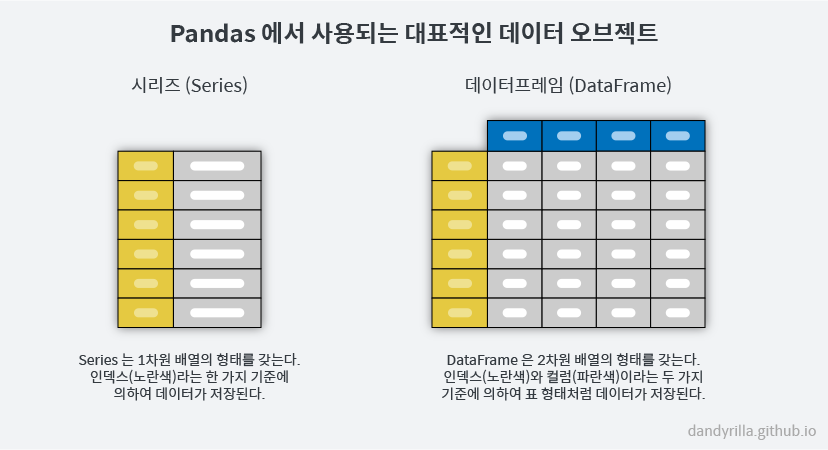

### 1) Series 
 

- 1차원 배열의 형태를 가진 자료구조로 index와 value를 가짐


In [ ]:
import pandas as pd

s = pd.Series([1,3,5,np.nan,6,8])

In [ ]:
print(s)

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64


In [ ]:
import pandas 
from pandas import Series, DataFrame 

s = Series([1,3,5,7])
print(s)
print(s.values)
print(s.index)

0    1
1    3
2    5
3    7
dtype: int64
[1 3 5 7]
RangeIndex(start=0, stop=4, step=1)


In [ ]:
s = Series([1,2,3,5], index=['a', 'b', 'c', 'd'])
print(s)
print(s.index)

a    1
b    2
c    3
d    5
dtype: int64
Index(['a', 'b', 'c', 'd'], dtype='object')


> ### 2) 데이터 프레임(data frame)


- 데이터프레임은 2차원 행렬구조의 테이블 형태로 구성됨
- 행방향 인덱스(index)와 열방향 칼럼(column)이 존재함

In [ ]:
import pandas as pd

values = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
index = ['첫째행', '둘째행', '셋째행']
columns = ['컬럼1', '칼럼2', '칼럼3']

df = pd.DataFrame(values, index=index, columns=columns)
print(df)

     컬럼1  칼럼2  칼럼3
첫째행    1    2    3
둘째행    4    5    6
셋째행    7    8    9


> ### 3) 데이터 프레임의 생성


- 데이터프레임은 리스트(List), 딕셔너리(dict), Numpy의 ndarrays, 또 다른 데이터프레임으로 생성할 수 있음
- 데이터 분석시에 csv 파일을 읽어와서 생성하는 경우가 많음 

#### 데이터 프레임 생성(리스트, 딕셔너리)

In [ ]:
# 리스트로 생성하기
data = [
    ['100', '이순신', 9.7], 
    ['101', '강감찬', 8.9], 
    ['102', '을지문덕', 9.3], 
    ['103', '김유신', 6.1], 
]
df = pd.DataFrame(data)
print(df)

     0     1    2
0  100   이순신  9.7
1  101   강감찬  8.9
2  102  을지문덕  9.3
3  103   김유신  6.1


In [ ]:
# 생성된 데이터프레임에 열(columns)을 지정 
df = pd.DataFrame(data, columns=['학번', '이름', '점수'])
print(df)

    학번    이름   점수
0  100   이순신  9.7
1  101   강감찬  8.9
2  102  을지문덕  9.3
3  103   김유신  6.1


In [ ]:
# 딕셔너리로 생성하기
data = { '학번' : ['100', '101', '102', '103'],
'이름' : [ '이순신', '강감찬', '을지문덕', '김유신'],
         '점수': [9.7, 8.9, 9.3, 6.1,]}

df = pd.DataFrame(data)
print(df)

    학번    이름   점수
0  100   이순신  9.7
1  101   강감찬  8.9
2  102  을지문덕  9.3
3  103   김유신  6.1


#### 데이터프레임 생성(xls, csv)

In [ ]:
# 구글 드라이브 연결 
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

from os import path

base_folder_name = 'Colab Notebooks/99.Data/'
perch_csv = path.join('./drive/MyDrive/', base_folder_name, 'perch_csv.csv')
perch_xls = path.join('./drive/MyDrive/', base_folder_name, 'perch_xls.xlsx')
perch_xls_ko = path.join('./drive/MyDrive/', base_folder_name, 'perch_xls_ko.xlsx')
ex_grape = path.join('./drive/MyDrive/', base_folder_name, 'EX_GrapeData.csv')

Mounted at /content/drive


In [ ]:
#df = pd.read_csv("https://bit.ly/perch_csv_data") #원격지에 있는 파일이름임
df = pd.read_csv(perch_csv) #파일이 로컬에 저장되어 있을 경우(단, 콜랩에서는 구글 드라이브 활용)
print(df.head()) 

   length  height  width
0     8.4    2.11   1.41
1    13.7    3.53   2.00
2    15.0    3.82   2.43
3    16.2    4.59   2.63
4    17.4    4.59   2.94


In [ ]:
df = pd.read_excel(perch_xls)
print(df.head())

   length  height  width
0     8.4    2.11   1.41
1    13.7    3.53   2.00
2    15.0    3.82   2.43
3    16.2    4.59   2.63
4    17.4    4.59   2.94


In [ ]:
df = pd.read_excel(perch_xls_ko) #만약 한글이 깨진다면 pd.read_excel(perch_xls_ko, encoding='euc-kr)
print(df.head())

     길이    높이  폭(넓이)
0   8.4  2.11   1.41
1  13.7  3.53   2.00
2  15.0  3.82   2.43
3  16.2  4.59   2.63
4  17.4  4.59   2.94


> ### 3) 데이터 프레임의 접근


#### 데이터프레임 기술통계

In [ ]:
#dataframe 기술통계
print(df.describe())

             점수
count  4.000000
mean   8.500000
std    1.632993
min    6.100000
25%    8.200000
50%    9.100000
75%    9.400000
max    9.700000


#### 행으로 접근하기

In [ ]:
data = { '학번' : ['100', '101', '102', '103'],
'이름' : [ '이순신', '강감찬', '을지문덕', '김유신'],
         '점수': [9.7, 8.9, 9.3, 6.1,]}
df = pd.DataFrame(data)

In [ ]:
print(df.head(2)) # 앞 부분을 3개만 보기
print(df.tail(1)) # 뒷 부분을 3개만 보기
print(df['학번']) # '학번'에 해당되는 열을 보기

    학번   이름   점수
0  100  이순신  9.7
1  101  강감찬  8.9
    학번   이름   점수
3  103  김유신  6.1
0    100
1    101
2    102
3    103
Name: 학번, dtype: object


In [ ]:
print(df[1:5]) #1에서 4까지 출력
print(df[:3]) #2까지 출력
print(df[2:]) #2에서 끝까지 출력

    학번    이름   점수
1  101   강감찬  8.9
2  102  을지문덕  9.3
3  103   김유신  6.1
    학번    이름   점수
0  100   이순신  9.7
1  101   강감찬  8.9
2  102  을지문덕  9.3
    학번    이름   점수
2  102  을지문덕  9.3
3  103   김유신  6.1


#### 열로 접근하기

In [ ]:
# 데이터셋명[['행이름']]
# 데이터셋명[데이터셋명.columns[[행번호]]]
# 데이터셋명.loc[:, 첫 행 이름:끝 행 이름]

print(df[['학번']])
print(df[df.columns[[0, 2]]])
print(df.loc[:, '학번':'이름'])

    학번
0  100
1  101
2  102
3  103
    학번   점수
0  100  9.7
1  101  8.9
2  102  9.3
3  103  6.1
    학번    이름
0  100   이순신
1  101   강감찬
2  102  을지문덕
3  103   김유신


In [ ]:
#특정값 하나만 불러오기 
df.at[3, '이름'] #3 행의 이름 불러오기 

'김유신'

#### 데이터 정렬 및 추출

In [ ]:
#행열 변경 
print(df.T)

      0    1     2    3
학번  100  101   102  103
이름  이순신  강감찬  을지문덕  김유신
점수  9.7  8.9   9.3  6.1


In [ ]:
#정렬
print(df)
print('-------')
print(df.sort_index(axis=0, ascending=False)) #index를 기준으로 내림차순 정렬
print('-------')
print(df.sort_index(axis=1, ascending=True)) #컬럼을 기준으로 오름차순 정렬

    학번    이름   점수
0  100   이순신  9.7
1  101   강감찬  8.9
2  102  을지문덕  9.3
3  103   김유신  6.1
-------
    학번    이름   점수
3  103   김유신  6.1
2  102  을지문덕  9.3
1  101   강감찬  8.9
0  100   이순신  9.7
-------
     이름   점수   학번
0   이순신  9.7  100
1   강감찬  8.9  101
2  을지문덕  9.3  102
3   김유신  6.1  103


In [ ]:
print(df['점수'] > 8) # 점수가 8 이상이면 True 아니면 False

0     True
1     True
2     True
3    False
Name: 점수, dtype: bool


In [ ]:
print(df[df['점수'] > 9]) # 점수가 9 이상인 데이터만 출력

    학번    이름   점수
0  100   이순신  9.7
2  102  을지문덕  9.3


#### 복사, 변수이름 변경, 행추가 및 삭제

In [ ]:
#복사
df_copy = df.copy()
print(df_copy.columns)

Index(['학번', '이름', '점수'], dtype='object')


In [ ]:
#변수이름 변경
df_copy.rename(columns={'점수':'스코어'}, inplace=True)
print(df_copy.columns)

Index(['학번', '이름', '스코어'], dtype='object')


In [ ]:
#변수추가
df_copy.loc[df_copy['스코어']>=9, '학점'] = 'A'
df_copy.loc[df_copy['스코어']<9 , '학점'] = 'B'
df_copy.loc[((df_copy['스코어']>=7)&(df_copy['스코어']<8)), '학점'] = 'C'
df_copy.loc[((df_copy['스코어']>=6)&(df_copy['스코어']<7)), '학점'] = 'D'
print(df_copy)

    학번    이름  스코어 학점
0  100   이순신  9.7  A
1  101   강감찬  8.9  B
2  102  을지문덕  9.3  A
3  103   김유신  6.1  D


#### 데이터 범주 변경 

In [ ]:
#import pandas as pd
df = pd.read_csv(ex_grape)
#df.describe()

#brand 범주 카운트
print(df['brand'].value_counts())
df.head()

2    24
1    23
3    16
Name: brand, dtype: int64


,continent,brand,size,period,price
0,2,2,10.7,47.65,144
1,2,3,14.0,63.13,215
2,2,2,9.0,58.76,105
3,1,1,8.0,34.88,69
4,2,2,10.0,55.53,134


In [ ]:
#brand 범주 변경 
re_brand = {"brand": { 1:1, 2:1, 3:2}}
re_df = df.replace(re_brand)
print(re_df['brand'].value_counts())
re_df.head() 

1    47
2    16
Name: brand, dtype: int64


,continent,brand,size,period,price
0,2,1,10.7,47.65,144
1,2,2,14.0,63.13,215
2,2,1,9.0,58.76,105
3,1,1,8.0,34.88,69
4,2,1,10.0,55.53,134


In [ ]:
#함수를 이용하여 brand 범주 변경 
def brand_groups(series):
  if (series==1):
    return 1
  elif series==2:
    return 1
  elif series==3:
    return 2

df['re_brand'] = df['brand'].apply(brand_groups)
df.head()        

,continent,brand,size,period,price,re_brand
0,2,2,10.7,47.65,144,1
1,2,3,14.0,63.13,215,2
2,2,2,9.0,58.76,105,1
3,1,1,8.0,34.88,69,1
4,2,2,10.0,55.53,134,1


#### Numpy & Pandas 전환하기 

- 머신러닝&딥러닝에서는 Numpy를 활용한 연산이 성능이 우수함. 
- Pandas에서 데이터에 대한 이해도를 높인 후에 Numpy로 변환하여 머신러닝을 수행함

In [ ]:
df_num = df.to_numpy()
print(df)
print(df_num)

    continent  brand  size  period price  re_brand
0           2      2  10.7   47.65   144         1
1           2      3  14.0   63.13   215         2
2           2      2   9.0   58.76   105         1
3           1      1   8.0   34.88    69         1
4           2      2  10.0   55.53   134         1
..        ...    ...   ...     ...   ...       ...
58          1      1   5.0   16.66  21.5         1
59          2      1  21.0   43.00               1
60          2      2   5.0   12.00               1
61          2      3  13.0   20.00               2
62          2      3  31.0   19.00               2

[63 rows x 6 columns]
[[2 2 10.7 47.65 '144' 1]
 [2 3 14.0 63.13 '215' 2]
 [2 2 9.0 58.76 '105' 1]
 [1 1 8.0 34.88 '69' 1]
 [2 2 10.0 55.53 '134' 1]
 [2 2 10.5 43.14 '129' 1]
 [2 2 16.0 54.86 '155' 1]
 [2 1 15.0 44.14 '99' 1]
 [2 1 6.5 17.46 '38.5' 1]
 [2 1 5.0 21.04 '36.5' 1]
 [2 2 25.0 109.38 '260' 1]
 [1 1 10.4 17.67 '54' 1]
 [1 1 7.4 16.41 '39' 1]
 [1 1 5.4 12.02 '29.5' 1]
 [2 2 1

In [ ]:
# numpy를 pandas로 변환하기
df_pd = pd.DataFrame(df_num)
print(df_pd.head())

df_pd2 = pd.DataFrame(data=df_num, columns = ['continent', 'brand', 'size', 'period', 'price', 're_brand'])
print(df_pd2.head())


   0  1     2      3    4  5
0  2  2  10.7  47.65  144  1
1  2  3    14  63.13  215  2
2  2  2     9  58.76  105  1
3  1  1     8  34.88   69  1
4  2  2    10  55.53  134  1
  continent brand  size period price re_brand
0         2     2  10.7  47.65   144        1
1         2     3    14  63.13   215        2
2         2     2     9  58.76   105        1
3         1     1     8  34.88    69        1
4         2     2    10  55.53   134        1


# ★★★연습문제★★★

### 1) 데이터프레임 생성하기(리스트)




In [ ]:
#실습
#리스트를 이용하여 아래와 같은 데이터와 컬럼명을 가진 데이터 프레임을 만드시오.
#자동차 아이디 - 100, 101, 102, 103
#자동차 이름 - BMW, Benz, 제네시스, 롤스로이스
#자동차 가격 - 1000, 1200, 1200, 1500

data = [[100, 'BMW', 1000], [101, 'Benz', 1200],[102, '제네시스', 1200], [103, '롤스로이스', 1500]]

#df1 = pd.DataFrame(data)
#print(df1)

df1 = pd.DataFrame(data, columns=['아이디', '이름', '가격'])
print(df1)


   아이디     이름    가격
0  100    BMW  1000
1  101   Benz  1200
2  102   제네시스  1200
3  103  롤스로이스  1500


### 2) 데이터프레임 생성하기(딕셔너리)


In [ ]:
#실습
#딕셔너리를 이용하여 아래와 같은 데이터와 컬럼명을 가진 데이터 프레임을 만드시오.
#자동차 아이디 - 100, 101, 102, 103
#자동차 이름 - BMW, Benz, 제네시스, 롤스로이스
#자동차 가격 - 1000, 1200, 1200, 1500

data = {'아이디': [100, 101, 102, 103], '이름': ['BMW', 'Benz', '제네시스', '롤스로이스'], '가격':[1000, 1200, 1200, 1500]}
df1 = pd.DataFrame(data)
print(df1)


df2 = df1.copy()



   아이디     이름    가격
0  100    BMW  1000
1  101   Benz  1200
2  102   제네시스  1200
3  103  롤스로이스  1500


### 3) 데이터프레임 생성하기(CSV, Excel파일)



In [ ]:
#실습
#아래 경로에 있는 파일을 데이터 프레임으로 읽어 오시오. 
#https://bit.ly/perch_csv_data

df = pd.read_csv('https://bit.ly/perch_csv_data')
print(df.head())


   length   height   width
0     8.4     2.11    1.41
1    13.7     3.53    2.00
2    15.0     3.82    2.43
3    16.2     4.59    2.63
4    17.4     4.59    2.94


### 4) 데이터프레임 접근 실습

In [ ]:
#실습
#앞서 만든 학번-점수 데이터 프레임을 학점이 높은 순으로 sorting 하시오. 
print(df)
print('-------------')
print(df.sort_values(by='점수', ascending=True))

    학번    이름   점수
0  100   이순신  9.7
1  101   강감찬  8.9
2  102  을지문덕  9.3
3  103   김유신  6.1
-------------
    학번    이름   점수
3  103   김유신  6.1
1  101   강감찬  8.9
2  102  을지문덕  9.3
0  100   이순신  9.7


In [ ]:
#실습
#앞서 만든 자동차 데이터 프레임 중에서 가격이 1200 이상인 것만 출력하시오. 
print(df1)
print('---')
print(df1['가격'] >= 1200)
print('---')
print(df1[df1['가격'] >= 1200])

   아이디     이름    가격
0  100    BMW  1000
1  101   Benz  1200
2  102   제네시스  1200
3  103  롤스로이스  1500
---
0    False
1     True
2     True
3     True
Name: 가격, dtype: bool
---
   아이디     이름    가격
1  101   Benz  1200
2  102   제네시스  1200
3  103  롤스로이스  1500
